<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/DL/introduction_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

Un perceptrón es un modelo simple de red neuronal artificial que se utiliza para la clasificación binaria. El perceptrón fue desarrollado por Frank Rosenblatt en 1957 y se utiliza para separar los datos en dos clases utilizando una función de activación escalón.

Un perceptrón tiene entradas, pesos y un sesgo, y produce una salida binaria en función de la suma ponderada de las entradas multiplicadas por sus respectivos pesos, y una función de activación que compara esta suma con un umbral (el sesgo). Si la suma ponderada es mayor o igual al umbral, el perceptrón activa su salida, que es un 1, y si la suma ponderada es menor que el umbral, la salida es 0.

El perceptrón es capaz de aprender mediante el ajuste de los pesos y el sesgo a medida que se presentan datos de entrenamiento. A través del proceso de entrenamiento, el perceptrón se ajusta para producir la salida deseada para cada entrada. El perceptrón puede ser visto como una unidad de procesamiento de entrada-salida simple que toma en cuenta las entradas y produce una salida en función de las conexiones ponderadas.

A pesar de su simplicidad, los perceptrones son capaces de resolver problemas linealmente separables y han sido utilizados en una amplia variedad de aplicaciones, incluyendo reconocimiento de patrones, clasificación de imágenes y reconocimiento de caracteres.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def perceptron(b, tasa_aprendizaje, w1, w2, x1, x2, y, n_muestras):
    cont=0
    errores = True
    while errores:
        errores = False
        for i in range(n_muestras):
            z = ((x1[i] * w1)+(x2[i] * w2)) + b # calculamos z
            #funcion escalón
            if z >= 0:
                z = 1
            else:
                z = 0
          #verificación del error
            if z != y[i]:
                errores = True
                # calcular errores
                error = (y[i] - z)
                # ajustar sesgo
                b = b + ((tasa_aprendizaje * error))
                # ajustar pesos
                w1 = w1 + (x1[i] * error * tasa_aprendizaje)
                w2 = w2 + (x2[i] * error * tasa_aprendizaje)
        cont=cont+1
    return w1, w2, b, cont

La función perceptron() implementa el algoritmo de entrenamiento del perceptrón simple para resolver un problema de clasificación binaria. Los argumentos de entrada son:</br>

b: el valor del sesgo (bias).</br>
fac_ap: el factor de aprendizaje (learning rate), que determina el tamaño del paso de ajuste de los pesos y del sesgo en cada iteración del algoritmo.</br>
w1 y w2: los pesos correspondientes a las características (features) x1 y x2, respectivamente.</br>
x1 y x2: dos vectores que contienen las características de cada muestra de entrada.</br>
y: un vector que contiene las etiquetas de las muestras de entrada (0 o 1).</br>
n_muestras: el número de muestras de entrenamiento.</br></br>
La función utiliza un bucle while que se ejecuta hasta que no haya errores de clasificación en el conjunto de entrenamiento. En cada iteración, se calcula el valor de la función de activación para la muestra de entrada correspondiente (a partir de los pesos y el sesgo actuales) y se compara con la etiqueta real de la muestra. Si hay un error de clasificación, se ajustan los pesos y el sesgo en función del factor de aprendizaje y el error cometido, para tratar de corregir el error en la siguiente iteración.

La función devuelve los valores de los pesos y el sesgo finales, así como el número de iteraciones necesarias para entrenar el modelo.

In [ ]:
or_or  = {
    'x1': [0, 0, 1, 1],
    'x2': [0, 1, 0, 1],
    'y': [0, 1, 1, 1]
}

or_df = pd.DataFrame(or_or)


#parametros de entrada:
b = 0 #bias
tasa_aprendizaje = 0.1
w1 = 0.001 #peso_1
w2 = 1000 #peso_1
x1 = or_df["x1"]
x2 = or_df["x2"]
y = or_df["y"]
n_muestras = len(y)


w1, w2, b, i  = perceptron(b, tasa_aprendizaje, w1, w2, x1, x2, y, n_muestras)
print ("w1 = ", w1)
print ("w2 = ", w2)
print ("b = ", b)
print ("i = ", i)

w1 =  0.101
w2 =  1000.0
b =  -0.1
i =  3


In [ ]:
#se prueba el algoritmo:

z = x1.copy()
for i in x1:
    z[i] = ((x1[i]* w1) + (x2[i] * w2)) + b # calculamos z
    if z[i] >= 0:
        y[i] = 1
    else:
        y[i] = 0

print('Valores_predichos',y.values,) 
print('Valores_originales', or_df.y.values)
print('mismos_valores?: ',y.values==or_df.y.values)

Valores_predichos [0 1 1 1]
Valores_originales [0 1 1 1]
mismos_valores?:  [ True  True  True  True]


La función toma como entrada el sesgo (b), la tasa de aprendizaje (fac_ap), el peso inicial (w1), los datos de entrada (x1), las etiquetas de salida (y), el número de muestras (n_muestras) y el número máximo de iteraciones (iteraciones).

En cada iteración, el perceptrón calcula la salida (z) para cada muestra utilizando la suma ponderada de las entradas y los pesos. Luego, compara la salida con la etiqueta de salida verdadera y ajusta el sesgo y el peso si la salida no es correcta.

El proceso continúa hasta que todas las muestras son clasificadas correctamente o el número máximo de iteraciones se alcanza. La función devuelve el peso actualizado (w1), el sesgo actualizado (b) y el número de iteraciones que tardó el perceptrón en converger.

In [ ]:
def perceptron_lineal(b, taza_aprendizaje, w1, x1, y, n_muestras, iteraciones):
    cont=0
    errores = True
    while (errores and cont<iteraciones) :
        errores = False
        for i in range(n_muestras):
            z = (x1[i] * w1)+ b # calculamos z
            """
            if z >= 0:
                z = 1
            else:
                z = 0
            """
            if z != y[i]:
                errores = True
                # calcular errores
                error = (y[i] - z)
                # ajustar sesgo
                b = b + ((taza_aprendizaje * error))
                # ajustar pesos
                w1 = w1 + (x1[i] * error * taza_aprendizaje)
        cont=cont+1
    return w1, b, cont

In [ ]:
#Parametros de entrada perceptron_lineal
b = 1
taza_aprendizaje = 0.05
w1 = 2

#"""
np.random.seed(42)
x1 = np.random.rand(10)
y = 2*x1 + 0.5 + (np.random.rand(10)-0.5)*0.5
#"""

n_muestras = len(y)
iteraciones=10000
w1, b, i = perceptron_lineal(b, taza_aprendizaje, w1, x1, y, n_muestras, iteraciones)
print ("w1 = ", w1)
print ("b =", b)
print ("i =", i )

w1 =  2.3355239500475644
b = 0.2674285430850408
i = 10000


Text(0.5, 1.0, 'valor actual vs predicción')

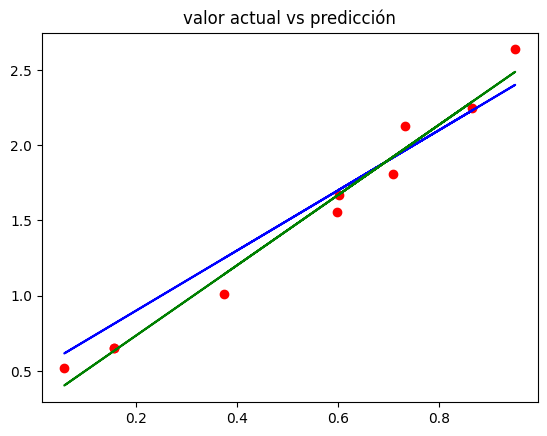

In [ ]:
y_h=w1*x1+b
y_p=0.5+2*x1
%matplotlib inline
plt.plot(x1,y,"ro")
plt.plot(x1,y_p,"b")
plt.plot(x1,y_h,"g")
plt.title("valor actual vs predicción")

# Perceptron Multiclase

El Perceptrón Multiclase es una extensión del Perceptrón Binario que permite la clasificación de múltiples clases. En el Perceptrón Binario, la salida se limita a dos valores (1 o 0), mientras que en el Perceptrón Multiclase, la salida puede tener varios valores correspondientes a las diferentes clases.

El proceso de entrenamiento del Perceptrón Multiclase es similar al del Perceptrón Binario. Sin embargo, en lugar de tener un único conjunto de pesos y sesgos para la capa de salida, se tienen varios conjuntos de pesos y sesgos, uno para cada clase.

Durante la fase de entrenamiento, el Perceptrón Multiclase compara la salida esperada con la salida real para cada clase y ajusta los pesos y sesgos correspondientes para minimizar el error. Una vez entrenado, el Perceptrón Multiclase puede clasificar entradas desconocidas asignándolas a una de las clases previamente definidas en función de la salida que genere.

El Perceptrón Multiclase puede implementarse mediante una red neuronal de una sola capa, en la que cada neurona corresponde a una clase diferente. También se pueden utilizar varias capas para mejorar la precisión y capacidad de generalización del modelo.

In [ ]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import math


# Semilla
np.random.seed(11)

La función one_hot convierte un vector de etiquetas de clase a en una matriz binaria de "one-hot encoding", donde cada fila representa una etiqueta y cada columna representa una posible clase. La función devuelve una matriz con valores de -1 excepto por aquellos correspondientes a la clase, que están en 1.

Por ejemplo, si a = [0, 1, 2] y hay tres clases posibles, la función devolverá una matriz de 3x3 con los siguientes valores:

In [ ]:
#funbcion de salida
def one_hot(a):
  b = -1 * np.ones((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

<Figure size 640x480 with 0 Axes>

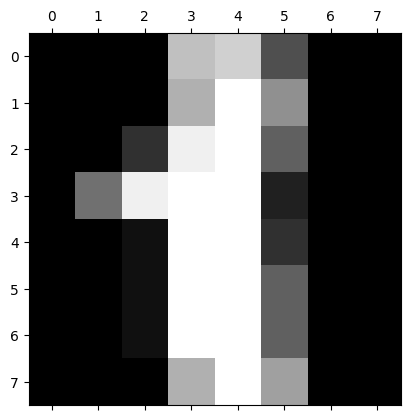

In [ ]:
# cargando el dataset de digitos
digits = datasets.load_digits()
plt.gray()
plt.matshow(digits.images[1])

In [ ]:
# Codificación one-hot de la etiqueta de destino, Y 
Y = digits.target
Y = one_hot(Y)
Y[1]

array([-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.])

En este código, se está agregando una columna de unos a la matriz X que contiene las imágenes de los dígitos. Esta nueva columna se utiliza para absorber el sesgo b del hiperplano en la matriz X.

Esto es necesario para que el modelo pueda ajustar el hiperplano de manera óptima al conjunto de datos. La razón detrás de esto es que un hiperplano en d dimensiones se puede expresar como w1x1 + w2x2 + ... + wdxd + b = 0, donde x1, x2, ..., xd son las características de entrada y w1, w2, ..., wd, b son los parámetros del modelo. La adición de una columna de unos a X permite que el modelo ajuste el valor de b junto con los pesos w1, w2, ..., wd durante el entrenamiento.

In [ ]:
# Agregar columna de unos para absorber el sesgo b del hiperplano en X 
X = digits.data
bias_ones = np.ones((len(X), 1))
X = np.hstack((X, bias_ones))

In [ ]:
# construccion de los datasets de entrenamiento, validacion y test
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.12517)
print("Training dataset: ", X_train.shape)
print("Validation dataset: ", X_val.shape)
print("Test dataset: ", X_test.shape)

Training dataset:  (1257, 65)
Validation dataset:  (180, 65)
Test dataset:  (360, 65)


<Figure size 640x480 with 0 Axes>

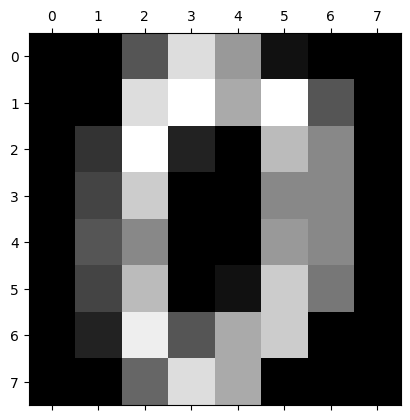

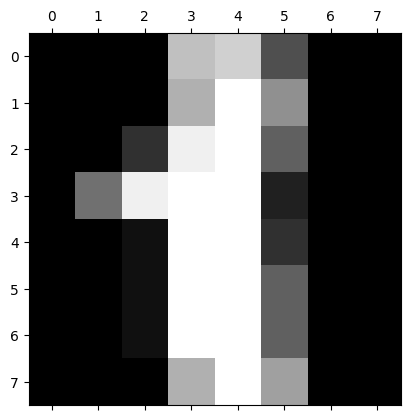

In [ ]:
#impresion de 2 digitos de muestra 
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
plt.show();



La función signum() es una función de activación de tipo umbral (threshold), también conocida como función de salto. Toma un valor real como entrada y devuelve un valor binario, 1 si la entrada es mayor o igual que cero y -1 si es menor que cero. Esta función es utilizada en el Perceptrón original de Rosenblatt como función de activación de la neurona

In [ ]:
#Aquí definimos una función signum
def signum(x):
    if x >=0: return 1
    else : return -1

Este código implementa la función general del perceptrón, un algoritmo de aprendizaje supervisado utilizado para clasificación binaria. La función toma como entrada los datos de entrenamiento X_train y sus correspondientes etiquetas de clase Y_train, el número máximo de épocas que se utilizarán para el entrenamiento y la tasa de aprendizaje.

La función comienza inicializando los pesos a cero y luego iterando sobre los datos de entrenamiento durante el número máximo de épocas especificado. En cada iteración, se calcula la predicción del perceptrón para la muestra xi, y_hat, utilizando los pesos actuales w y la función signum. Si la etiqueta de clase real yi y la predicción y_hat no coinciden, los pesos se actualizan utilizando la regla de aprendizaje del perceptrón.

El proceso de actualización de pesos continúa hasta que se alcance el número máximo de épocas o se logre una tasa de error mínima. La función devuelve los pesos finales w y el número de errores de actualización m.

In [ ]:
#funcion general del perceptron

def Perceptron(X_train,Y_train,epochs,lr):
    epoch = 1
    m = 1
    # One vs Rest es un problema de clasificación de dos clases 
    
    w = np.zeros((X_train.shape[1],1))     #Inicializando los pesos como 0 
    
    #Iterando hasta que se alcanzan las iteraciones (épocas) o cuando el error se convierte en 0 
    while(m!=0 and epoch <= epochs):       
        m = 0 
        for xi,yi in zip(X_train,Y_train):  # Iterando sobre cada muestra y la etiqueta de clase correspondiente
            y_hat = signum(np.dot(w.T,xi)[0]) 
                                            
            if yi*y_hat <0:                 #Condición para muestras mal clasificadas 
                w = (w.T + yi*xi).T         ##Actualización de pesos
                m = m + 1                   #Conteo de errores de actualización 
        epoch = epoch + 1                   #Incremento de la iteracion (época)
    return w,m

In [ ]:
#entrenamiento del modelo:
# Definición de una matriz de peso (Número_de_características * Número de clases) para almacenar cada vector de peso 

weights = np.zeros((X_train.shape[1],Y_train.shape[1])) 
for i in range(Y_train.shape[1]):
    w,err = Perceptron(X_train,Y_train[:,i],100,1)  #Obtener el vector de peso 
    weights[:,i] = w[:,0]                           ##Almacenamiento en la matriz de peso 


La función predictclass() recibe como entrada el conjunto de datos de prueba (X_fit) y sus etiquetas de clase correspondientes (Y_fit) y los pesos del modelo entrenado (weights). Luego, la función itera sobre cada muestra de prueba y calcula el producto punto entre los pesos y las características de la muestra. Si el resultado es positivo, se predice la clase correspondiente para esa muestra y se detiene la iteración para esa muestra. El proceso se repite para todas las muestras de prueba. Finalmente, se devuelve el conjunto de predicciones.

In [ ]:
#Predecir las clases en base a los vectores de peso 

def predictclass(X_fit,Y_fit,weights):
    predictedclass = np.zeros(X_fit.shape[0])
    for i in range(X_fit.shape[0]):
        for j in range(Y_fit.shape[1]):
            predict = np.dot(weights[:,j],X_fit[i,:]) #Predicción por muestreo 
            if predict >0:
                predictedclass[i] = j
                break
    return predictedclass     #Función para encontrar la precisión 

La función accuracy(Y_val,predictedclass) calcula la precisión del modelo en base a las etiquetas verdaderas Y_val y las etiquetas predichas predictedclass. Recorre cada muestra en el conjunto de validación y compara la etiqueta verdadera con la etiqueta predicha. Si son iguales, no se produce error, de lo contrario se suma uno al error. Al final, devuelve la precisión del modelo calculando 1 - (error / número total de muestras).

In [ ]:
def accuracy(Y_val,predictedclass):
    error = 0
    numsamples = Y_val.shape[0]
    for i in range(numsamples):
        Actualclass = Y_val[i,:]
        if Actualclass[int(predictedclass[i])]!=1.0:
             error+=1
    return (1-error/numsamples)          #Array de clase predicha para el conjunto de validación 


In [ ]:
#entrenamiento:
#Array de clase predicha para el conjunto de entrenamiento 
predictedclass = predictclass(X_train,Y_train,weights)#Precisión para el conjunto de prueba 

print('#Precisión para el conjunto de Entrenamiento: ', str(round(accuracy(Y_train,predictedclass) * 100, 2)))
#Val
predictedclass = predictclass(X_val,Y_val,weights)
print('#Precisión para el conjunto de validación: ', str(round(accuracy(Y_val,predictedclass) * 100, 2)))
      
#test      
predictedclass = predictclass(X_test,Y_test,weights)#Precisión para el conjunto de prueba 
print('#Precisión de clase predicha para el conjunto de prueba : ', str(round(accuracy(Y_test,predictedclass) * 100, 2)))    

#Precisión para el conjunto de Entrenamiento:  92.76
#Precisión para el conjunto de validación:  91.11
#Precisión de clase predicha para el conjunto de prueba :  89.44


En Keras, una red neuronal se define como una secuencia de capas (layers) que transforman los datos de entrada en una forma útil para la tarea de aprendizaje. En general, se utilizan tres tipos de capas en Keras:

Capas de entrada: transforman los datos de entrada en una forma que pueda ser procesada por la red neuronal. Por ejemplo, una capa de entrada para imágenes puede redimensionar y normalizar los píxeles de la imagen.

Capas ocultas: transforman la salida de la capa anterior en una forma más abstracta que sea útil para la tarea de aprendizaje. Las capas ocultas suelen ser capas densas (fully connected), en las que cada neurona está conectada a todas las neuronas de la capa anterior.

Capa de salida: transforma la salida de la última capa oculta en una forma que se pueda interpretar para la tarea de aprendizaje. Por ejemplo, una capa de salida para la clasificación de imágenes puede producir una distribución de probabilidad sobre las posibles clases.

En Keras, se define una red neuronal secuencial mediante la creación de un objeto Sequential y agregando capas una por una en el orden en que se deben aplicar. Luego, la red se compila mediante el método compile, que especifica la función de pérdida, el optimizador y las métricas que se utilizarán para evaluar el rendimiento del modelo. Finalmente, se entrena la red utilizando el método fit, que ajusta los pesos de las capas para minimizar la función de pérdida en el conjunto de entrenamiento.

In [ ]:
from keras.utils import to_categorical

digits = datasets.load_digits()
# flattening the images
xi = digits.images.reshape((len(digits.images), -1))
xi_scale = xi/xi.max()


from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(xi_scale, digits.target, test_size=0.2, random_state=42)

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_train.shape[1]

10

In [ ]:
import keras
from keras.models import Sequential #arquitectura
from keras.layers import Dense      #capa de la red  

Sequential() es una clase en Keras que se utiliza para crear modelos de redes neuronales secuenciales, es decir, aquellas que se componen de capas una tras otra.

In [ ]:
#Se inicializa la red 
red_1 = Sequential()
red_2 = Sequential()

#Se definen diferentes posibles capas
capa_1=Dense(xi_scale.shape[1], input_dim=xi_scale.shape[1], use_bias=1, activation='relu')
capa_20=Dense(11, use_bias=1, activation='relu')
capa_21=Dense(xi_scale.shape[1]/ 2, use_bias=1 ,activation='tanh')
capa_22=Dense(11, use_bias=1,activation='relu')
capa_3=Dense(y_train.shape[1], use_bias=1, activation='softmax')
capa_33=Dense(y_train.shape[1], use_bias=1, activation='softmax')

red_1.add(capa_1)
red_1.add(capa_20)
red_1.add(capa_3)
print(red_1.summary())

red_2.add(capa_1)
red_2.add(capa_21)
red_2.add(capa_33)
print(red_2.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 11)                715       
                                                                 
 dense_52 (Dense)            (None, 10)                120       
                                                                 
Total params: 4,995
Trainable params: 4,995
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)      



Este código compila la red neuronal creada anteriormente en Keras, especificando el optimizador a utilizar (Adam), la función de pérdida a optimizar (binary_crossentropy), y las métricas a utilizar para evaluar el desempeño de la red durante el entrenamiento (en este caso, la precisión).

El optimizador Adam es un algoritmo de descenso de gradiente estocástico que se utiliza para actualizar los pesos de la red durante el entrenamiento. La función de pérdida binary_crossentropy es una medida de la discrepancia entre las etiquetas verdaderas y las predicciones de la red neuronal, y se utiliza comúnmente para problemas de clasificación binaria. La métrica de precisión se utiliza para evaluar la tasa de aciertos de la red en las predicciones.

In [ ]:
red_1.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)


#%%timeit
history_1 =red_1.fit(X_train,
        y_train,
        validation_data=(X_test,y_test),    
        epochs=10,
        batch_size=64,
        verbose=1
       )

Epoch 1/10
23/23 [==============================] - 2s 19ms/step - loss: 0.2012 - accuracy: 0.5720 - val_loss: 0.1917 - val_accuracy: 0.6194
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 0.1889 - accuracy: 0.6360 - val_loss: 0.1837 - val_accuracy: 0.6639
Epoch 3/10
23/23 [==============================] - 0s 8ms/step - loss: 0.1819 - accuracy: 0.6625 - val_loss: 0.1774 - val_accuracy: 0.6833
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.1750 - accuracy: 0.6952 - val_loss: 0.1699 - val_accuracy: 0.7056
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.1687 - accuracy: 0.7112 - val_loss: 0.1630 - val_accuracy: 0.7194
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.7314 - val_loss: 0.1567 - val_accuracy: 0.7306
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.7474 - val_loss: 0.1498 - val_accuracy: 0.7667
Epoch 8/10
23/23 [=

In [ ]:
red_2.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
#%%timeit
history_2 =red_2.fit(X_train,
        y_train,
        validation_data=(X_test,y_test),    
        epochs=10,
        batch_size=64,
        verbose=1
       )

Epoch 1/10
23/23 [==============================] - 1s 9ms/step - loss: 0.1527 - accuracy: 0.8956 - val_loss: 0.1369 - val_accuracy: 0.9056
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.9068 - val_loss: 0.1221 - val_accuracy: 0.9194
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 0.9235 - val_loss: 0.1102 - val_accuracy: 0.9250
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 0.9339 - val_loss: 0.0995 - val_accuracy: 0.9306
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.0971 - accuracy: 0.9360 - val_loss: 0.0912 - val_accuracy: 0.9389
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9429 - val_loss: 0.0835 - val_accuracy: 0.9389
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9527 - val_loss: 0.0780 - val_accuracy: 0.9389
Epoch 8/10
23/23 [==

La red entrenanda con tanh en la capaoculta logra una mejora en la validación

12/12 [==============================] - 0s 3ms/step
[[29  1  0  3  0  0  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0]
 [31  0  0  2  0  0  0  0  0  0]
 [ 5  0  0 29  0  0  0  0  0  0]
 [45  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  0  0 45  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0]
 [33  0  0  0  0  1  0  0  0  0]
 [26  0  0  0  0  1  0  0  3  0]
 [24  0  0  2  0  3  0  0  0 11]]


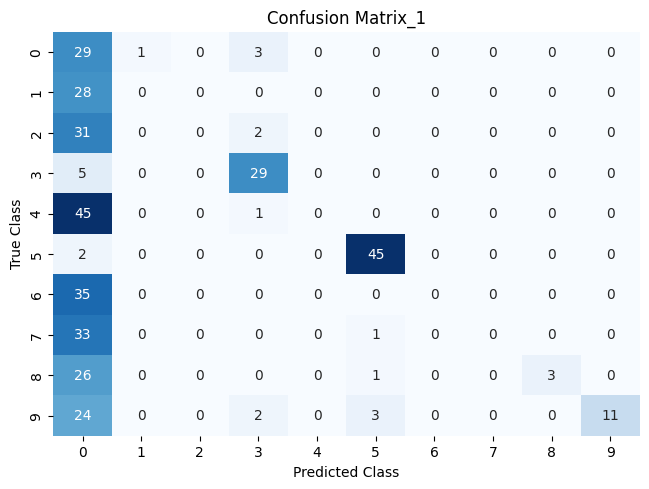

              precision    recall  f1-score   support

           0       0.88      0.11      0.20       258
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.85      0.78      0.82        37
           4       0.00      0.00      0.00         0
           5       0.96      0.90      0.93        50
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.10      1.00      0.18         3
           9       0.28      1.00      0.43        11

    accuracy                           0.33       360
   macro avg       0.31      0.38      0.26       360
weighted avg       0.86      0.33      0.37       360



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_1=red_1.predict(X_test)
y_pred_1 = np.round(y_pred_1)
y_true = np.argmax(y_test, axis=1)


y_pred_1 = np.argmax(y_pred_1, axis=1)

y_pred_2=red_2.predict(X_test)
y_pred_2 = np.round(y_pred_2)
y_pred_2 = np.argmax(y_pred_2, axis=1)

confusion_matrix_1 = confusion_matrix(y_true, y_pred_1)
print(confusion_matrix_1)

# crear marco de datos de pandas Crear un conjunto de datos
class_names = list(range(10))
dataframe = pd.DataFrame(confusion_matrix_1, index=class_names, columns=class_names)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix_1"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_pred_1,y_true))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.11      0.20       258
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.85      0.78      0.82        37
           4       0.00      0.00      0.00         0
           5       0.96      0.90      0.93        50
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.10      1.00      0.18         3
           9       0.28      1.00      0.43        11

    accuracy                           0.33       360
   macro avg       0.31      0.38      0.26       360
weighted avg       0.86      0.33      0.37       360



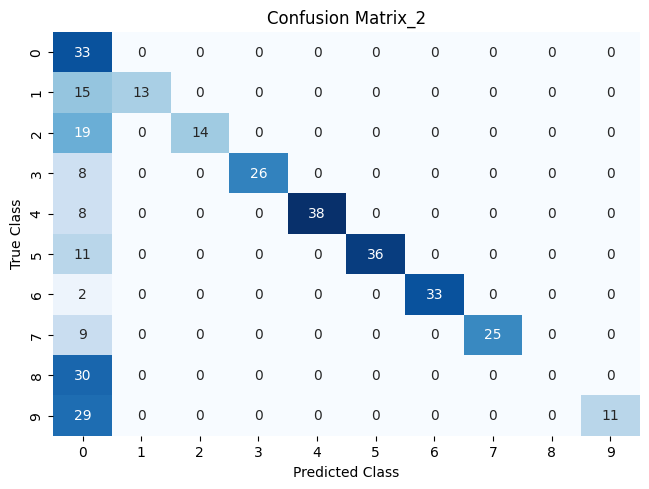

              precision    recall  f1-score   support

           0       1.00      0.20      0.34       164
           1       0.46      1.00      0.63        13
           2       0.42      1.00      0.60        14
           3       0.76      1.00      0.87        26
           4       0.83      1.00      0.90        38
           5       0.77      1.00      0.87        36
           6       0.94      1.00      0.97        33
           7       0.74      1.00      0.85        25
           8       0.00      0.00      0.00         0
           9       0.28      1.00      0.43        11

    accuracy                           0.64       360
   macro avg       0.62      0.82      0.65       360
weighted avg       0.85      0.64      0.60       360



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# crear marco de datos de pandas Crear un conjunto de datos
class_names = list(range(10))
dataframe = pd.DataFrame(confusion_matrix_2, index=class_names, columns=class_names)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix_2"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_pred_2,y_true))

12/12 [==============================] - 0s 2ms/step


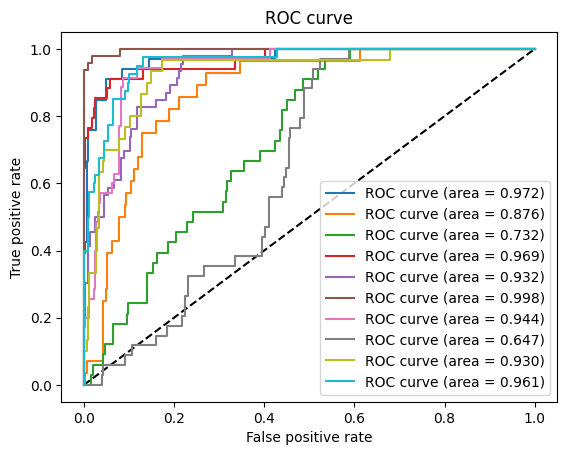

In [ ]:
from sklearn.metrics import roc_curve, auc

n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = red_1.predict(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.3f})'.format(roc_auc[i]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="best")
plt.show()


12/12 [==============================] - 0s 1ms/step


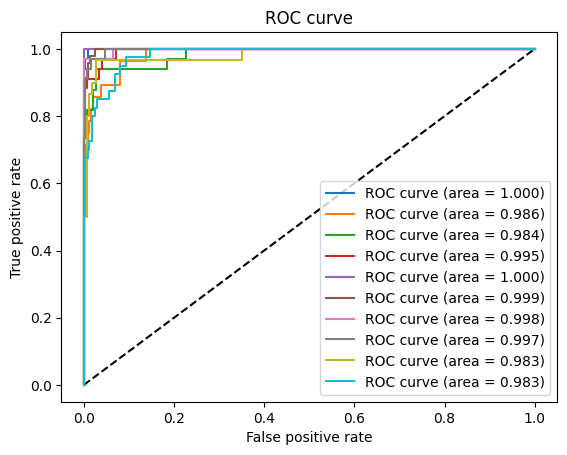

In [ ]:
from sklearn.metrics import roc_curve, auc

n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred_2 = red_2.predict(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.3f})'.format(roc_auc[i]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="best")
plt.show()


In [ ]:
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
acc_train = history_1.history['accuracy']
acc_val = history_1.history['val_accuracy']

loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
acc_train = history_2.history['accuracy']
acc_val = history_2.history['val_accuracy']

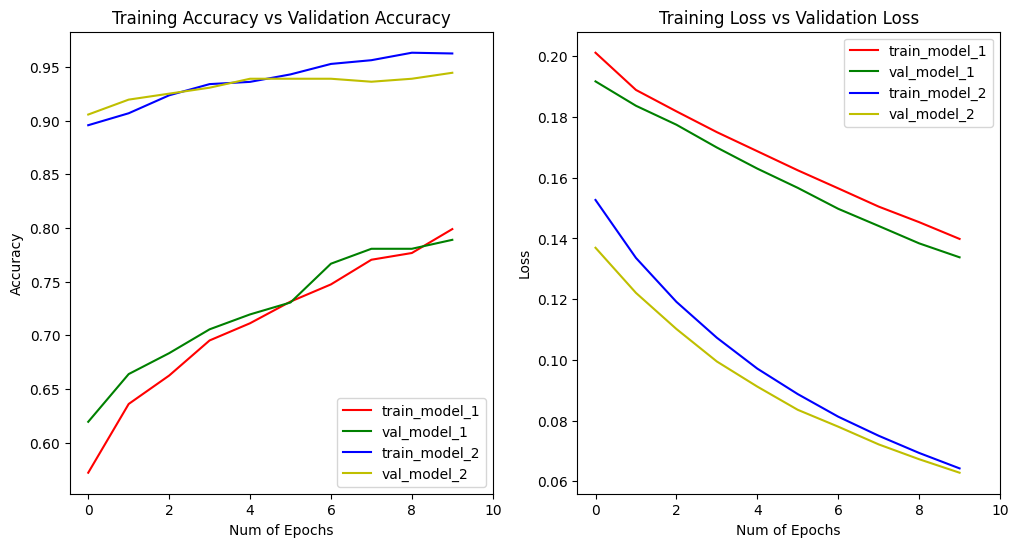

In [ ]:
# Gráfico de precisión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history_1.history['accuracy'],'r')  
ax1.plot(history_1.history['val_accuracy'],'g') 
ax1.plot(history_2.history['accuracy'],'b')  
ax1.plot(history_2.history['val_accuracy'],'y') 
ax1.set_xticks(np.arange(0, 11, 2.0))
ax1.set_xlabel("Num of Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Training Accuracy vs Validation Accuracy")
ax1.legend(['train_model_1', 'val_model_1', 'train_model_2', 'val_model_2'])

# Gráfico de pérdida
ax2.plot(history_1.history['loss'],'r')  
ax2.plot(history_1.history['val_loss'],'g') 
ax2.plot(history_2.history['loss'],'b')  
ax2.plot(history_2.history['val_loss'],'y') 
ax2.set_xticks(np.arange(0, 11, 2.0))
ax2.set_xlabel("Num of Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Training Loss vs Validation Loss")
ax2.legend(['train_model_1', 'val_model_1', 'train_model_2', 'val_model_2'])

plt.show()